# Herramientas de Visualización para Análisis Exploratorio de los Datos

## Objetivos de la sesión

En esta sesión vamos a aprender a utilizar los siguientes tipos de gráficos:
- Gráficos de caja y bigotes (Boxplot)
- Gráficos violin
- Histogramas
- Gráficos de barras

Vamos a hacer uso de las librerias `pandas` con `matplotlib` por debajo y `seaborn` (solo en los casos necesarios).

## Introducción

El objetivo del análisis exploratorio de los datos es obtener información inicial acerca de las variables de nuestro dataset para concer cómo se comportan de forma aislada y cómo se relacionan entre ellos.

Muchas veces basta con observar detenidamente el resumen de los datos para hacerse una idea de los descriptivos básicos. Sin embargo, a veces encontramos que las visualizaciones de datos pueden capturar una gran cantidad de información de una sola vez de una forma más clara y concisa.

### Gráfico de Caja (boxplot)

Los gráficos de caja nos ofrecen información acerca de cinco valores concretos, además de permitirnos identificas los valores atípicos en una variable. Dentro de la caja nos encontramos los valores que se encuentran entre los percentiles 25 y 75. Se dibuja una línea en el recuadro para mostrar dónde se encuentra la mediana (o el percentil 50).

Las líneas que salen desde las cajas son denominadas bigotes. Estos bigotes nos informan de los valores que se encuentran entre el percentil 75 y el percentil 75 más 1.5 veces el rango intercuartílico (por arriba) y entre el percentil 25 y el percentil 25 menos 1.5 veces el rango intercuartílico (por abajo).

El rango intercuartil es la diferencia entre el primer y tercer cuartil.

Ya que esta explicación verbal puede ser confusa, aquí hay algunas fórmulas:

Rango Inter Cuartílico (IQR) = Tercer Cuarto - Primer Cuarto

Límite superior de bigote < Tercer cuartil + 1.5 * IQR

Límite inferior de bigote > Primer cuartil - 1.5 * IQR

Podemo variar el multiplicador del rango intercuartílico para establecer límites más o menos laxos en la detección de outliers.

Con todo esto en mente, trazaremos un gráfico de caja con los datos de nuestros vehículos.

Primero cargamos el conjunto de datos de los vehículos usando pandas.

In [2]:
%matplotlib inline

In [3]:
import pandas as pd

vehicles = pd.read_csv('./data/vehicles/vehicles.csv')

vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Ahora que ya hemos leido el dataframe podemos probar nuestro primer boxplot con datos reales. Vamos a dibujar un diagrama de caja y bigotes de la medida de MPG combinada

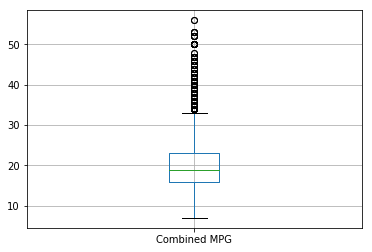

In [21]:
vehicles.boxplot(column="Combined MPG")

En este caso utilizamos la función `.boxplot` y no la `.plot`

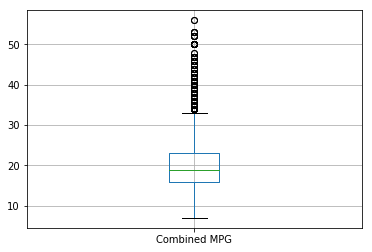

In [17]:
vehicles.boxplot(column="Combined MPG", whis=[0, 98])

En `matplotlib` existe un parámetro de la función `boxplot` que nos permite decidir en qué rango incluimos los bigotes de nuestro gráfico. Este parámetro se llama `whis` y podemos ver cómo funciona en el código de arriba.

En cualquier caso, lo que podemos inferir de este gráfico de caja es que los datos están sesgados debido a un gran número de valores atípicos extremos que tienen muy buenos índices MPG. También podemos ver que la mediana no está exactamente en el centro de la caja.

NOTA: este es el tipo de variables que, tras evaluar su asimetría, podemos transformar utilizando el logaritmo en base n sobre los valores de la propia variable, veamos qué ocurre si hacemos esto

In [6]:
import numpy as np

In [7]:
vehicles["Log Combined MPG"] = np.log(vehicles["Combined MPG"])

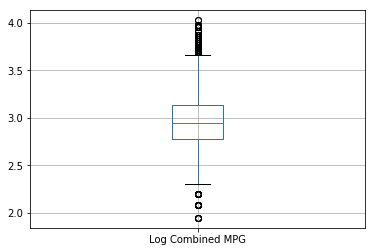

In [20]:
vehicles.boxplot(column="Log Combined MPG")

### Diagrama de Violín

El diagrama de violín es muy similar al de caja y bigotes. La diferencia principal es que el diagrama de caja es de ancho fijo, mientras que el diagrama de violín varía en grosor a lo largo del gráfico. La diferencia en el grosor nos indica la ocurrencia de los valores (la zona más gruesa será la que acumula una mayor cantidad de valores). Hay una capa adicional dentro del gráfico que nos informa de los valores que ocurren el 95% de las veces. Finalmente, hay un punto central que significa el valor promedio.

Para utilizar este tipo de gráficos necesitamos la librería `seaborn`

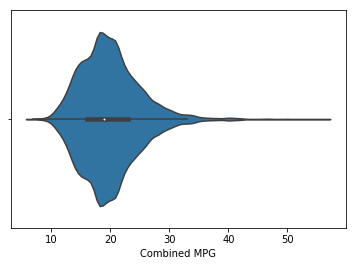

In [9]:
import seaborn as sns

sns.violinplot("Combined MPG", data=vehicles)

### Histogram

Los histogramas son gráficos que nos permiten tener una visión simplificada de la distribución de un conjunto de datos. Cuando dibujamos un histograma, lo que hacemos es separar los datos en contenedores, y luego dibujar el conteo para cada contenedor como si fuese un gráfico de barras.

El número de contenedores puede alterar en gran medida el aspecto del histograma, por lo que debemos tener cuidado al seleccionar este número. El número predeterminado de contenedores con Pandas es 10.

Como ejemplo, trazaremos el histograma de `Fuel Barrels/Year`.

Este es el histograma con 10 contenedores. Observamos cómo se asemeja a la distribución normal.

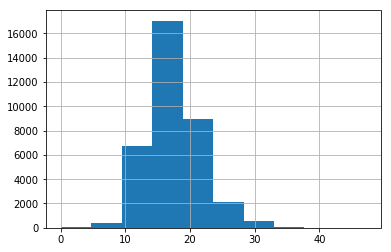

In [10]:
vehicles['Fuel Barrels/Year'].hist()

Cuando cambiamos a 50 contenedores, los datos casi parecen bimodales.

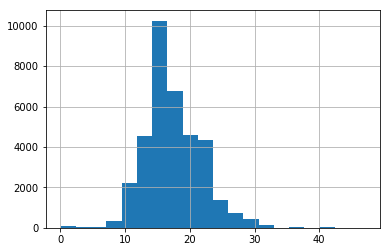

In [24]:
vehicles['Fuel Barrels/Year'].hist(bins=20)

### Gráfico de Barras

Los gráficos de barras son visualmente similares a los histogramas. Sin embargo, representan datos diferentes. Los gráficos de barras muestran datos categóricos mientras que los histogramas muestran datos numéricos. Cada barra muestra el conteo de cada categoría. De esta manera podemos visualizar claramente la distribución de los datos entre las diferentes categorías.

En este ejemplo nos gustaría trazar el diagrama de barras para la variable `Drivetrain`. Para ello, primero encontramos los recuentos de cada categoría en esta variable utilizando la función value_counts.

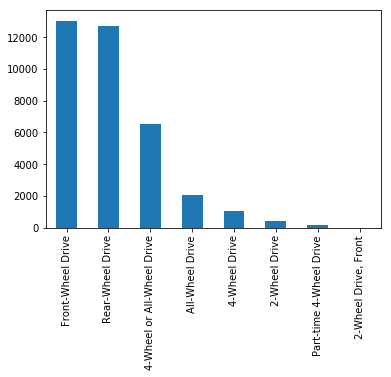

In [12]:
vehicles['Drivetrain'].value_counts().plot.bar()

## Resumen

En esta lección hemos aprendido a dibujar diferentes gráficos que pueden ayudarnos a descubrir información sobre nuestros datos. Sobre los diagramas de caja hemos aprendido que nos informan acerca de cinco valores y nos pueden ayudar a detectar valores atípicos. Sobre los diagramas de violín hemos aprendido que nos informan de algo similar al diagrama de caja incluyendo la densidad de la distribución. Sobre los histogramas aprendimos que nos ayudan a visualizar la distribución de nuestras variables continuas dividiendo estas variables en distintos contenedores y dibujando el conteo de los mismos. Finalmente, hemos aprendido que los gráficos de barras nos ayudan a comprender mejor nuestras variables categóricas, dibujando el conteo de casos en cada una de ellas. Estos cuatro diagramas son solo una introducción a las herramientas que necesitamos para ser eficaces en el análisis exploratorio de datos, a partir de aquí tendremos que explorar más herramientas y maneras más complejas de representación gráfica de los datos.